In [1]:
import warnings
warnings.filterwarnings('ignore')

# **Visualization of the Decision Tree algorithm weights**

One of the most powerful supervised machine learning algorithms today, gradient-based boosting (Catboost, XBGR) is built on such an apparently easy and basic element as a binary tree, or decision tree. And it is a building block of the algorithm, in this case we can tell a parable about a broom and its parts, but in our case, sometimes even a single decision tree can give good results in solving problems of classification and regression. And in this article we will take a closer look under the bonnet of the algorithm, on the example of Decision Tree from the sklearn library. We will also visualize its work.

#### Install lib dtreeviz for visualize

In [2]:
%pip install dtreeviz==1.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 793.5 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.8.4
    Uninstalling graphviz-0.8.4:
      Successfully uninstalled graphviz-0.8.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet-cu110 1.9.1 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.20.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


## **DecisionTree - classification**

We will train and test our models on two data sets taken from an open source - Kaggle.
+ 1. Data with numerical attributes to classify the presence of diabetes in a person
+ 2. Data with categorical features for predicting math scores|

In [3]:
# import diabet dataframe
import pandas as pd
df_clf =  pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df_clf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We begin with the classification task. The data set is based on certain diagnostic measurements, limited to 1000 values, where women from the Pima Indian tribe were selected. Let's examine a detailed description of each of the traits given to us:
+ Pregnancies - number of number of pregnancies
+ Glucose - plasma glucose concentration
+ BloodPressure is the dystolic blood pressure.
+ Skin Thickness - the thickness of the triceps skin
+ Insulin - blood insulin content
+ BMI - body mass index
+ DiabetesPedigreeFunction - genetic diabetes coefficient
+ Age - age
+ Outcome - our target variable, where 0 is no diabetes, 1 is has

Our goal, as stated above, is the variable "Outcome", that is, a binary trait. In the next step we divide the data set into a training sample and a test sample, with the proportions 71:29 (you can experiment with this indicator).

In [4]:
from sklearn.model_selection import train_test_split

target_df_clf = df_clf['Outcome']
feature_df_clf = df_clf.drop(columns=['Outcome'])

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(feature_df_clf, 
                                                                    target_df_clf,
                                                                    test_size=0.29, 
                                                                    random_state=11)

After we have prepared the data, let's start training with the DecisionTreeClassifier model. This is still the same binary decision tree, we use GridSearchCV to automatically select model parameters. It is necessary to find the optimal solution and optimize the time cost.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': [i for i in range(1, 20)],
              'min_samples_leaf': [i for i in range(1, 25)], 
               'max_leaf_nodes': [i for i in range(1, 20)]}]


dtc_model = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=10)
dtc_model.fit(X = X_train_clf.values,
          y = y_train_clf)

prediction_clf = dtc_model.best_estimator_.predict(X_test_clf)
score = accuracy_score(y_test_clf, prediction_clf)

print(f'Best parameters: {dtc_model.best_estimator_}')
print(f'Train score: {round(dtc_model.best_score_*100, 2)}')
print(f'Тest score: {round(score*100, 2)}')

Best parameters: DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=7,
                       min_samples_leaf=8)
Train score: 74.31
Тest score: 72.65


The obtained accuracy of our model is 72%, which is already pretty good, and it is only 1 tree. For the record, if we apply this model in real conditions, we can reduce the threshold for the classification of a positive result (treshold). As in life, a false positive result is better than a false negative, because you can do in-depth research. But for our model, what matters now is absolute accuracy. 

Now let's try to visualize the result and see how the model allocated weights to classify the target feature.

[Text(0.4230769230769231, 0.875, 'X[1] <= 143.5\nentropy = 0.931\nsamples = 545\nvalue = [356, 189]'),
 Text(0.15384615384615385, 0.625, 'X[5] <= 26.4\nentropy = 0.782\nsamples = 418\nvalue = [321, 97]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.187\nsamples = 105\nvalue = [102, 3]'),
 Text(0.23076923076923078, 0.375, 'X[1] <= 100.5\nentropy = 0.882\nsamples = 313\nvalue = [219, 94]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.547\nsamples = 103\nvalue = [90, 13]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.962\nsamples = 210\nvalue = [129, 81]'),
 Text(0.6923076923076923, 0.625, 'X[1] <= 165.5\nentropy = 0.849\nsamples = 127\nvalue = [35, 92]'),
 Text(0.5384615384615384, 0.375, 'X[6] <= 0.345\nentropy = 0.961\nsamples = 65\nvalue = [25, 40]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.992\nsamples = 29\nvalue = [16, 13]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.811\nsamples = 36\nvalue = [9, 27]'),
 Text(0.8461538461538461, 0.375, 'X[3] <= 32.5\nentropy = 0.

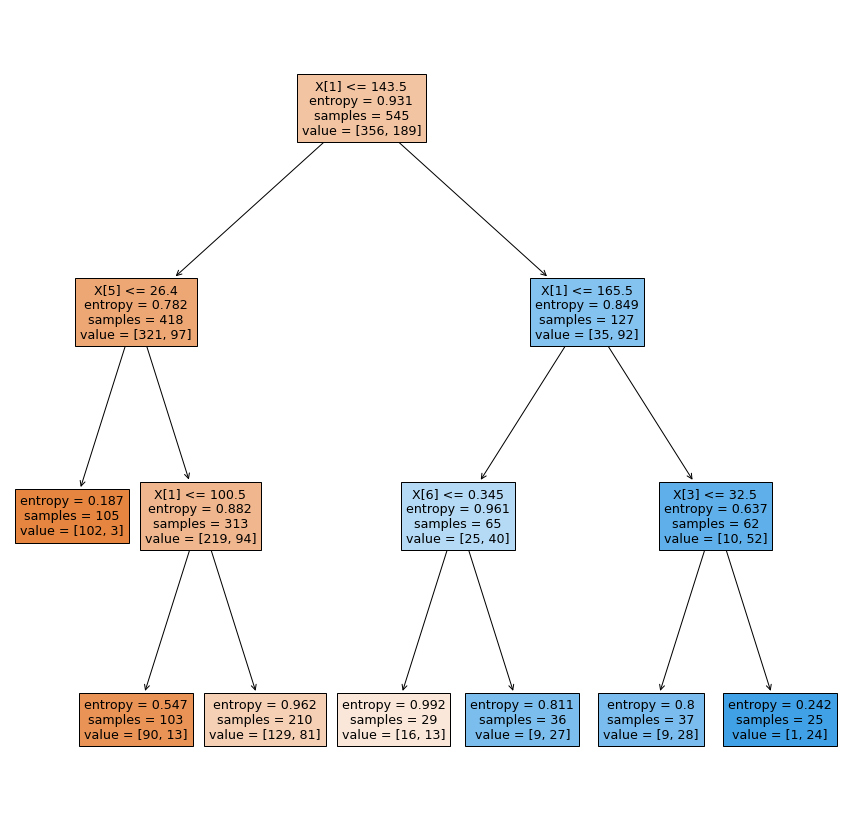

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(dtc_model.best_estimator_, filled=True, impurity=True)

We need to add some theory to understand our visualization :)
The model has chosen an algorithm to work based on entropy:

+ Entropy in turn aims to maximize information retrieval. It can easily be imagined as if we were guessing a puzzled character. And to do this as quickly as possible, we need to narrow down the options as little as possible with each question.

Another option that is also popular is the Ginny index:
+ With the Gini index as the target, the tree chooses a trait at each step and a threshold that will separate them.

*Вставить формулы*

But I like another way to visualize with the dtreeviz library, let's have a look at it.

In [ ]:
from dtreeviz.trees import dtreeviz

image_est = dtreeviz(dtc_model.best_estimator_,
               x_data=X_train_clf,
               y_data=y_train_clf,
               target_name='class',
               feature_names=[i for i in X_train_clf.columns],
               title="Visualiztion Decision Tree algorithm weights")
image_est.view()

An infographic of the process is presented in more detail. We can see how the tree selects solutions, maximizing the information, the depth of the tree turned out to be only 3, where all the attributes are involved, which is a great result for analysis.

This is really useful because we can compare the information we get with medical hypotheses, confirming the accuracy of our model. Judging from the graphs, with high blood sugar levels - the chance of having diabetes is increased, which coincides with generally accepted data.

## **DecisionTree - regression**

Now I propose to consider the regression (prediction) problem. To do this, we will use the second set of data on the students' performance in the exam. It consists on the basis of the received grades in different subjects.
+ Gender - gender of the student
+ Race/ethnicity - ethnic group (impersonal data)
+ Parental level of education - parents' level of education
+ Lunch - type of meal
+ Test preparation score - test preparation score
+ Math score - math score
+ Reading score - reading score
+ Writing score - writing score

Let's choose the target attribute - math score, we'll use absolute error as a metric.

Since the data is categorical, we need to process it and convert it into a numeric format, for that we will use LabelEncoder.

In [8]:
df_reg = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')
df_reg.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_reg = df_reg.apply(le.fit_transform)

target_df_reg = df_reg['math score']
feature_df_reg = df_reg[[i for i in df_reg.columns if i != 'math score']]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(feature_df_reg,
                                                                    target_df_reg, 
                                                                    test_size=0.29, 
                                                                    random_state=11)

Train the model using a similar approach with autoparameters.

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

tree_param = [{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'max_depth': [i for i in range(1, 20)],
              'min_samples_leaf': [i for i in range(1, 25)], 
              'max_leaf_nodes': [i for i in range(2, 20)],
              }]

dtr_model = GridSearchCV(DecisionTreeRegressor(), tree_param, cv=5)
dtr_model.fit(X = X_train_reg.values,
              y = y_train_reg)

prediction_reg = dtr_model.best_estimator_.predict(X_test_reg)
score_reg = mean_absolute_error(prediction_reg, y_test_reg)

print(f'Best parameters: {dtr_model.best_estimator_}')
print(f'Mean absolute error on train data: {round(score_reg, 3)}')

Error: no "view" mailcap rules found for type "image/svg+xml"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/DTreeViz_17.svg'


Best parameters: DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      max_leaf_nodes=19)
Mean absolute error on train data: 5.722


[Text(0.46120689655172414, 0.9166666666666666, 'X[5] <= 37.5\nabsolute_error = 12.232\nsamples = 710\nvalue = 46.0'),
 Text(0.16379310344827586, 0.75, 'X[6] <= 15.5\nabsolute_error = 9.142\nsamples = 282\nvalue = 34.0'),
 Text(0.06896551724137931, 0.5833333333333334, 'X[0] <= 0.5\nabsolute_error = 7.259\nsamples = 27\nvalue = 11.0'),
 Text(0.034482758620689655, 0.4166666666666667, 'absolute_error = 3.923\nsamples = 13\nvalue = 6.0'),
 Text(0.10344827586206896, 0.4166666666666667, 'absolute_error = 6.0\nsamples = 14\nvalue = 19.5'),
 Text(0.25862068965517243, 0.5833333333333334, 'X[0] <= 0.5\nabsolute_error = 7.882\nsamples = 255\nvalue = 35.0'),
 Text(0.1724137931034483, 0.4166666666666667, 'X[6] <= 30.5\nabsolute_error = 7.045\nsamples = 110\nvalue = 30.5'),
 Text(0.10344827586206896, 0.25, 'X[6] <= 22.5\nabsolute_error = 5.026\nsamples = 38\nvalue = 21.0'),
 Text(0.06896551724137931, 0.08333333333333333, 'absolute_error = 3.071\nsamples = 14\nvalue = 16.5'),
 Text(0.13793103448275862

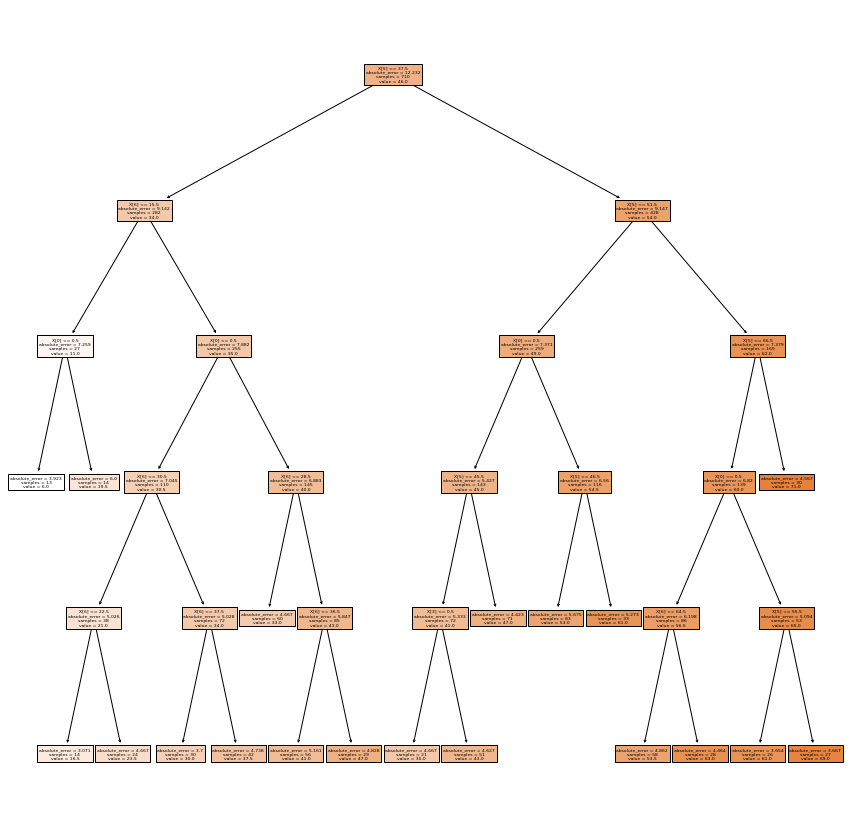

In [11]:
plt.figure(figsize=(15,15))
plot_tree(dtr_model.best_estimator_, filled=True, impurity=True)

In [12]:
image_est2 = dtreeviz(dtr_model.best_estimator_,
               x_data=X_train_reg,
               y_data=y_train_reg,
               target_name='class',
               feature_names=[i for i in X_train_reg.columns],
               title="Visualization Regression algorithm weights")
image_est2.view()

The decision tree is deeper than in the first case, since the regression problem here requires more data. Here the binary tree algorithm was the average absolute error.

Several conclusions can be drawn from the visualization of the weights: 
+ The model mostly involved grades in other subjects 
+ Writing skills have a connection to gender, i.e., they are significantly correlated
+ Student ethnicity was not used
+ Parents' education also had no effect on grades

'*' - have very little influence, so the binary tree chose other attributes

Perhaps by excluding grades in other subjects, the factors not included would have been involved, but the accuracy of the prediction would have suffered as well. In our case, the spread is +-6 points out of 100.

## **Random Forest**

And now comes the final moment, to check the visualization weights on the random forest algorithm. It is an ensemble model, that is, it uses several models within itself to predict a variable. In this case, the model trains several binary trees (with random_seed generation) and averages their results, resulting in increased accuracy.

We will train the classification model, and then display a visualization of all the trees in its ensemble.

In [13]:
def GridSearch_CV_RFС(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier

    estimator = RandomForestClassifier()
    param_tree = { 
            "n_estimators"      : [i for i in range(1, 21)],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            "max_depth": [i for i in range(1, 15)],
            'criterion': ['entropy', 'gini'],
            'n_jobs': [-1]
            }

    model_rfc = GridSearchCV(estimator, param_tree, n_jobs=-1, cv=5)
    model_rfc.fit(X_train, y_train)

    return model_rfc.best_score_ , model_rfc.best_estimator_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    
    print ("R2 score:",r2(y_test,y_predict))
    
    return y_test,y_predict

In [ ]:
score, model = GridSearch_CV_RFС(X_train_clf, y_train_clf)

Error: no "view" mailcap rules found for type "image/svg+xml"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/DTreeViz_17.svg'


In [ ]:
print(f'Test score: {round(score*100, 2)}%')

In [ ]:

plt.figure(figsize=(10,15))
fn = [i for i in X_train_clf.columns]
cn = ['Diabet', 'Not diabet']
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (30,10))
for index in range(0, 5):
    plot_tree(model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Tree № ' + str(index+1), fontsize = 11)
    

fig.savefig('rf_5trees.svg')

As you can see we have increased prediction accuracy from 72% to 77%, in total there are 12 binary trees in our "forest", ideally you can output each of them and analyze, for example I output the first 5 trees to consider their structure in general. Save the image better in vector format 'svg', so you can enlarge the image without loss of quality. Analyzing the structure, we see that the depth of trees has increased to 7, also many of them have become asymmetrical (one of the branches has much more branches)

## **Summary**

Let's summarize the results. Decision trees are the building block of more serious and efficient models, so by controlling it, we improve our overall performance. In our case, visualization helps not only to fulfill the direct purpose of seeing the work of the scales within the trained model, but also helps to create and confirm the hypotheses that machine learning offers us, as we have seen in the example of the classification of diabetes. With the work we have done, we improve the quality of any study, and we also provide useful information to non-machine-learning professionals.